In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать следующие данные: kc-house-data и laptop_price

In [42]:
df = pd.read_csv(r'./kc_house_data.csv', encoding='Windows-1251')
df.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14925,2770602360,20150421T000000,671000.0,4,2.75,1890,1475,2.0,0,0,...,9,1200,690,2015,0,98199,47.6472,-122.383,1650,1682
11124,3211270160,20140612T000000,485000.0,4,2.50,2470,35073,2.0,0,0,...,9,2470,0,1989,0,98092,47.3064,-122.108,2990,35259


1.2. Изучите стоимости недвижимости

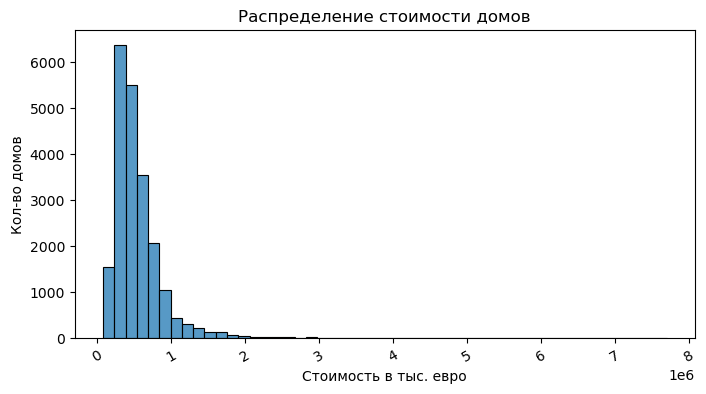

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=50)
plt.title('Распределение стоимости домов')
plt.xlabel('Стоимость в тыс. евро')
plt.ylabel('Кол-во домов')
plt.xticks(rotation=30);

1.3. Изучите распределение квадратуры жилой

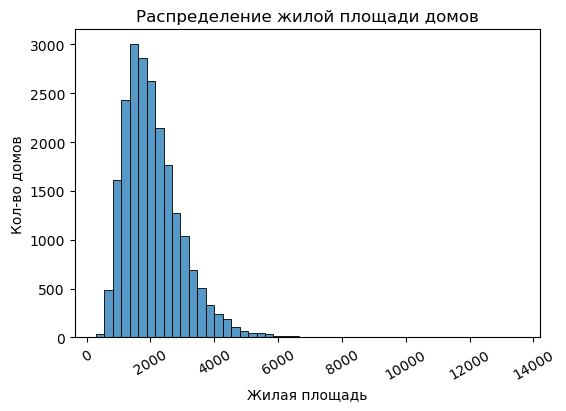

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(df['sqft_living'], bins=50)
plt.title('Распределение жилой площади домов')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во домов')
plt.xticks(rotation=30);

1.4. Изучите распределение года постройки

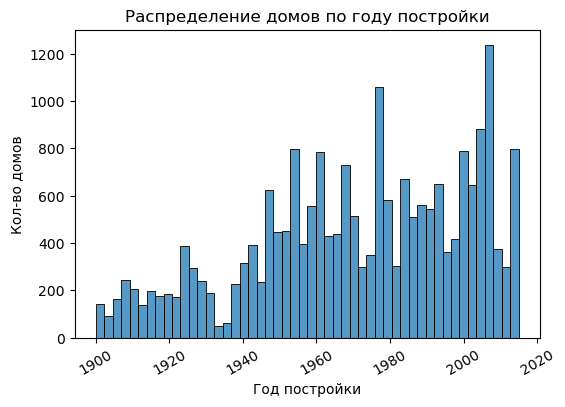

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['yr_built'], bins=50)
plt.title('Распределение домов по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов')
plt.xticks(rotation=30);

## 2 задача
2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [23]:
df_waterfront = df['waterfront'].value_counts()
df_waterfront

0    21450
1      163
Name: waterfront, dtype: int64

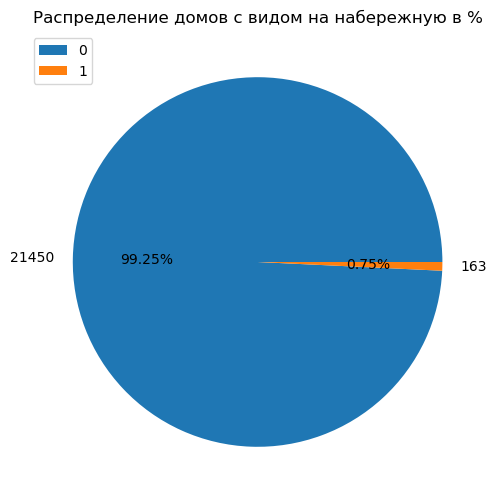

In [37]:
plt.figure(figsize=(10, 6))
plt.pie(df_waterfront.values, labels=df_waterfront.values, autopct='%1.2f%%')
plt.title('Распределение домов с видом на набережную в %')
plt.legend(df_waterfront.index, loc='upper left')

2.2. Изучите распределение этажей домов

In [30]:
df_floor = df['floors'].value_counts()
df_floor

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

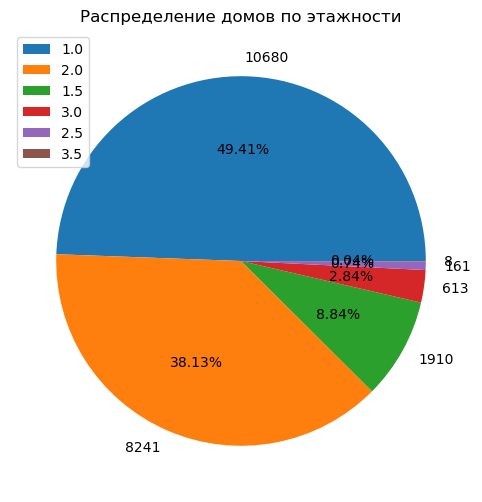

In [38]:
plt.figure(figsize=(10, 6))
plt.pie(df_floor.values, labels=df_floor.values, autopct='%1.2f%%')
plt.title('Распределение домов по этажности')
plt.legend(df_floor.index, loc='upper left')

In [34]:
df_con = df['condition'].value_counts()
df_con

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

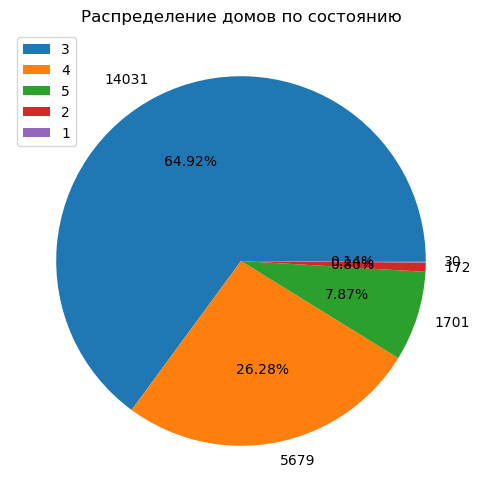

In [44]:
plt.figure(figsize=(10, 6))
plt.pie(df_con.values, labels=df_con.values, autopct='%1.2f%%')
plt.title('Распределение домов по состоянию')
plt.legend(df_con.index, loc='upper left')

Выводы: домов с видом на набережную менее 1% (0,75), большая часть домов малой этажности (1 или 2), большая часть домо в в среднем состоянии (64,92% в  3 категории состояния)

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [52]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4240\691288574.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0


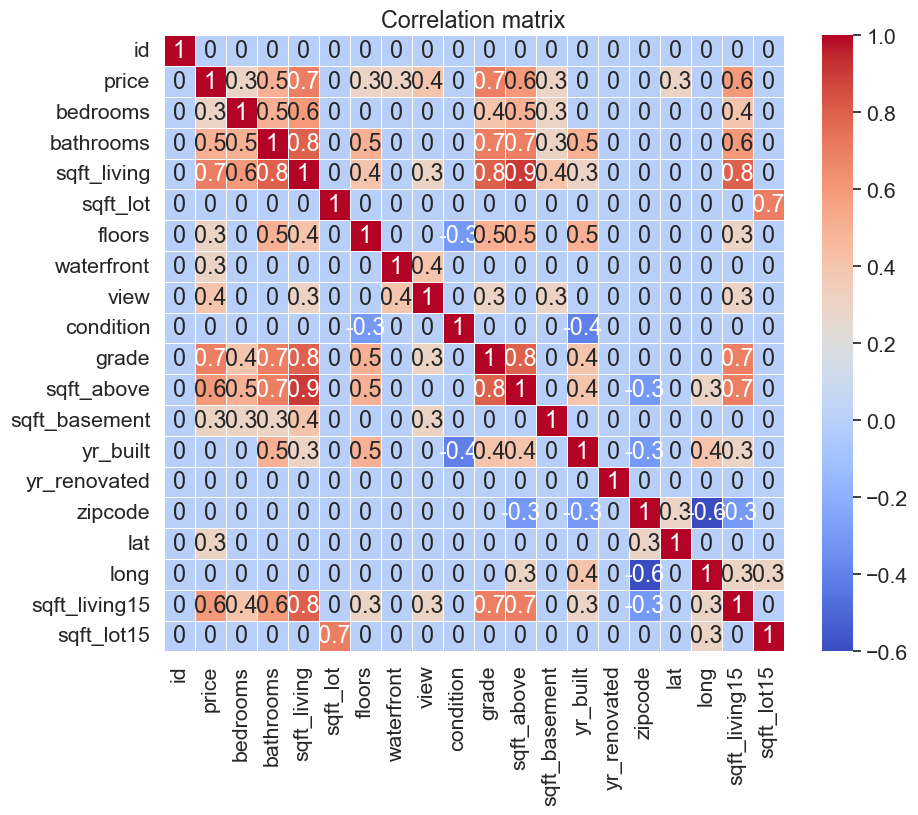

In [53]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

### Cогласно матрице корреляции, можетнаблюдаться линейная связь между чтоимостью дома и такими показателями как: grade, view, жилая площать, кол-во ванных комнат, состояние дома.

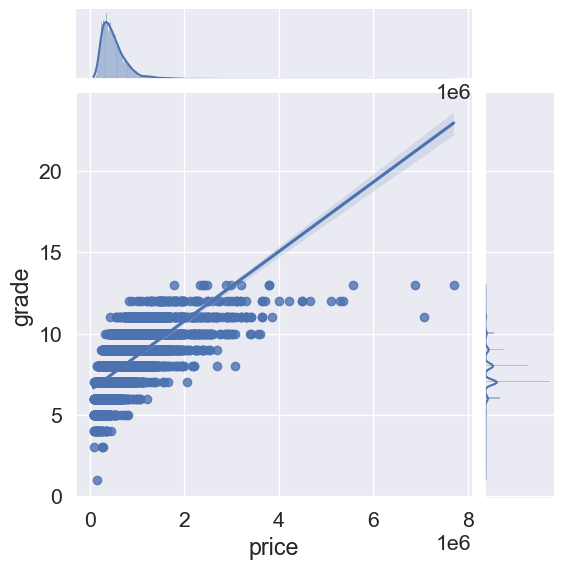

In [47]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

### Стоимость длма действительно зависит от показателя grade (оценка дизайна и конструкции), зависимость прямая - чем выше оценка, тем выше стоимость

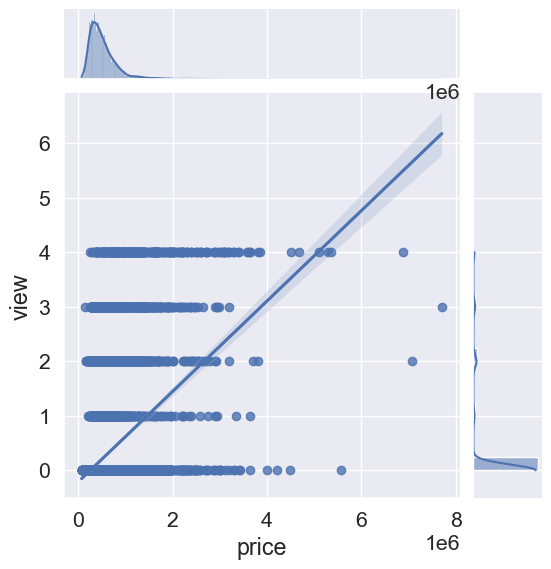

In [48]:
sns.jointplot(x=df['price'], y=df['view'], kind='reg');

### Есть прямая зависимоть от вида из ококн дома со стоимостью

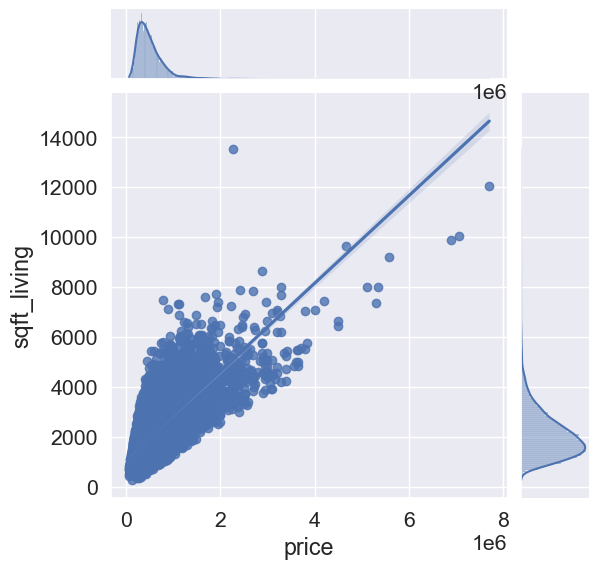

In [49]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

### Есть прямая зависимоть размера жилой площади дома со стоимостью

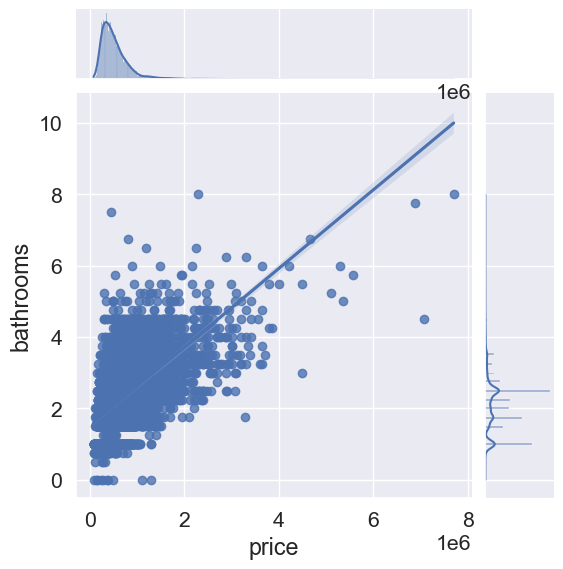

In [50]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg');

### Кол-во ванных комнат не оказывает прямое влияние на стомость дома

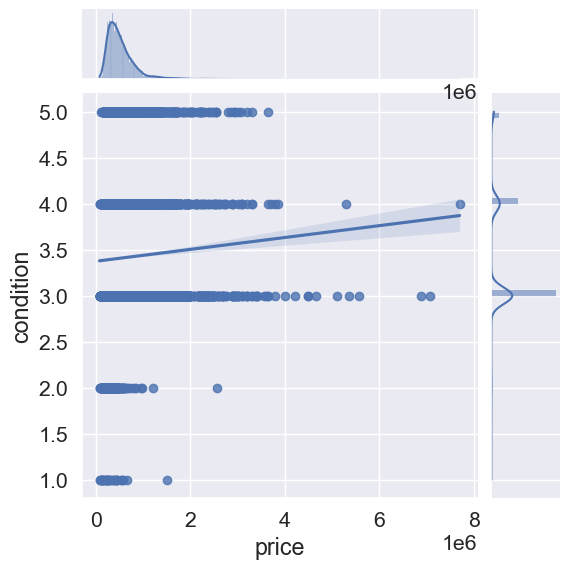

In [51]:
sns.jointplot(x=df['price'], y=df['condition'], kind='reg');

### Состояние дама оказывает влияние на стоимость только в рамках оценки от 3 до 4, что не является очевидной связью между характеристиками дома